# **Linear Regression from Scratch (NumPy)**

This notebook implements Linear Regression entirely from first principles using NumPy.

The objective is not just to train a model, but to understand:
- How parameters are updated,
- How gradients are derived,
- How scaling affects convergence,
- How evaluation metrics are computed manually.

No external machine learning libraries are used for modeling.

## **Dataset**
We use the Wine Quality dataset to predict wine quality based on physicochemical properties.

In [1]:
import sys
import os

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, "..")) 

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import *
from src.loss import *
from src.optimizer import *
from src.model import *
from src.metrics import *
from src.utils import *

In [3]:
data = np.loadtxt("../data/winequality-red.csv", delimiter=",", skiprows=1)

X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

## **Preprocessing**

Features are standardized before training because gradient descent converges 
faster when features are on comparable scales.

## **Train-Test Split**

The dataset is divided into:

- Training set - used to learn parameters
- Test set - used to evaluate generalization

### **Important:**

The scaler is fitted only on the training data.  
The test set is transformed using the training mean and standard deviation.

This prevents information leakage.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [6]:
model = LinearRegression(n_features=X_train.shape[1])

print(X_train.shape)
print(y_train.shape)
print(model.weights.shape)

(1279, 11)
(1279,)
(11,)


## **Training**

The model is trained using batch gradient descent.
Loss function: Mean Squared Error (MSE).

## **Loss Function**

We use Mean Squared Error (MSE) as the objective function.

MSE is differentiable and convex for linear regression, and heavily penalizes large errors.

## **Training Procedure**

For each epoch:

1. Compute predictions
2. Calculate error
3. Compute gradients
4. Update parameters
5. Record loss

Because linear regression has a convex loss surface, gradient descent is guaranteed to converge to the global minimum for a suitable learning rate.

In [7]:
optimizer = GradientDescent()

losses = model.fit(
    X_train,
    y_train,
    optimizer,
    learning_rate=0.1,
    epochs=1000
)

Epoch 0: Loss = 32.4143
Epoch 100: Loss = 0.4354
Epoch 200: Loss = 0.4352
Epoch 300: Loss = 0.4352
Epoch 400: Loss = 0.4352
Epoch 500: Loss = 0.4352
Epoch 600: Loss = 0.4352
Epoch 700: Loss = 0.4352
Epoch 800: Loss = 0.4352
Epoch 900: Loss = 0.4352


## **Results**

We evaluate performance using MSE (and optionally R²).
Loss curve is plotted below to visualize convergence.

In [8]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [9]:
print("Train MSE:", mse(y_train, model.predict(X_train)))
print("Test MSE:", mse(y_test, y_pred))

print("Train R2:", r2_score(y_train, model.predict(X_train)))
print("Test R2:", r2_score(y_test, y_pred))

Train MSE: 0.4351984665903881
Test MSE: 0.3500759717692873
Train R2: 0.34377564161316987
Test R2: 0.4224062337397684


## **Interpreting the Loss Curve**

The training loss should decrease smoothly.

If the loss:
- decreases steadily - learning rate is appropriate
- oscillates or explodes - learning rate is too high
- decreases extremely slowly - learning rate is too low

A smooth downward trend indicates stable optimization.

In [10]:
SAVE_PLOTS = False

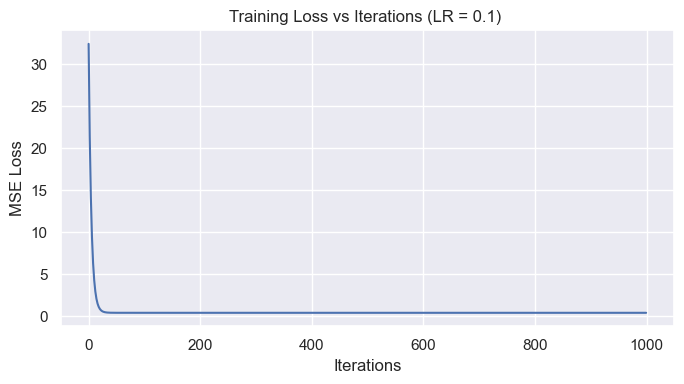

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(7,4))

sns.lineplot(
    x=range(len(losses)),
    y=losses
)

plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title(f"Training Loss vs Iterations (LR = 0.1) ")

plt.tight_layout()

if SAVE_PLOTS:
    plt.savefig(
        f"../experiments/plots/loss_run_lr_0.1.png")
else:
    plt.show()
plt.close()

**The model converges, indicating the learning rate is appropriate. Train and test performance are comparable, suggesting minimal overfitting.**

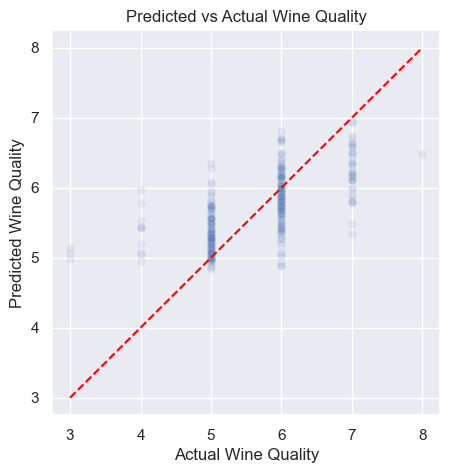

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test.flatten(),
                y=y_pred.flatten(),
                alpha=0.1)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")

plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Predicted vs Actual Wine Quality")
plt.show()

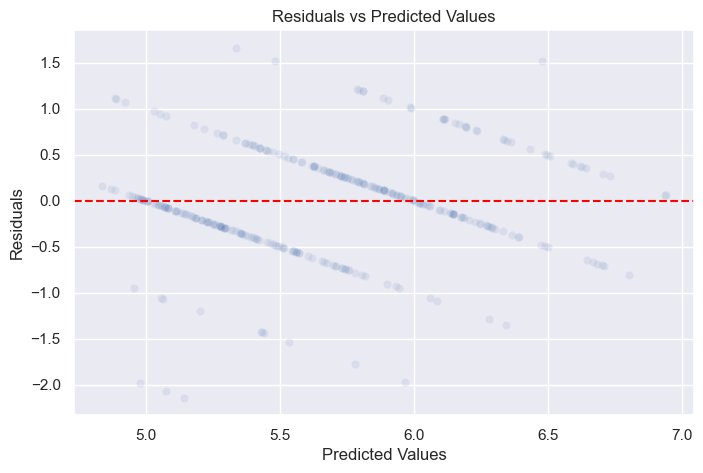

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred.flatten(),
                y=residuals.flatten(),
                alpha=0.1)

plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

## **Observations**

- Feature scaling significantly improves convergence speed.
- Loss decreases consistently, confirming correct gradient computation.
- The model generalizes reasonably well to unseen data.
- Since the loss surface is convex, optimization is stable.

This implementation provides full visibility into how linear regression operates internally.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

y_test_pred = sk_model.predict(X_test)

print(f"Test MSE : {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Test R2  : {r2_score(y_test, y_test_pred):.4f}")


Test MSE : 0.3501
Test R2  : 0.4224


## **Conclusion**

Implementing Linear Regression from scratch clarifies:

- How matrix operations drive predictions,
- How gradients shape parameter updates,
- How optimization behaves numerically,
- How evaluation metrics reflect model quality.

Understanding this foundation makes it easier to extend toward:
- Regularized regression,
- Stochastic gradient descent,
- Neural networks.